# Project: Data Scientist blogpost

For the blogpost, I chose the Titanic Dataset available at Kaggle (https://www.kaggle.com/c/titanic/data?select=train.csv)

The Titanic shipwreck was a major disaster. In this blogpost, we will analyze the dataset and see how and what type of people survived the crash. And vice-versa.

I plan to answer the following questions

- What types of people were most likely to survive based on Gender?
- What age groups are most likely to survive?
- Which class of passengers were most likely to survive?




## Data Preparation

We read in the dataset, prepare the data for evaluation later.

In [427]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [428]:
df = pd.read_csv('train.csv')

In [429]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We can see that the dataset has very interesting columns. An interesting fact to observe would be to see if more females survived the crash as a percentage or men. Next, we will drop some unnecessary columns.

In [430]:
df = df.drop(['Parch', 'SibSp', 'Ticket'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,NaN,S


In [431]:
def total_num(df, metric):
    '''
    Input:
    - df: Data frame containing columns to analyze
    - metric: string containing the column of interest

    Output:
    - return number of unique items in the column
    '''
    return df[metric].nunique()

# Helper lambda to extract a list for categories from a column
cat_col_list = lambda df, col: df[df[col].notna()][col].unique().tolist()

def create_cat_cols(df, col, prefix=''):
    '''
    Input:
    - df: Dataframe containing column 'col'
    - col: col of values with categorical info

    return:
    - a dataframe with categorical cols appended 

    Note: NA will be ignored
    '''
    new_cols = cat_col_list(df, col)
    df_2 = df.copy()

    for category in new_cols:
        df_2[prefix+str(category)] = df[col].apply(lambda g: 1 if g == category else 0)

    return df_2

Get the total number of passengers who were on the Titanic. There were apparently two females who were not able to make it onboard.

In [432]:
# Total number of people who embarked
print("The total number of passengers who embarked: {}, out of {} total".format(total_num(df[df.Embarked == 'C'], 'PassengerId')+\
total_num(df[df.Embarked == 'Q'], 'PassengerId')+\
total_num(df[df.Embarked == 'S'], 'PassengerId'), total_num(df, 'PassengerId')))

print("ports of embarkation: ", cat_col_list(df, 'Embarked'))

df = create_cat_cols(df, 'Embarked')
df = create_cat_cols(df, 'Pclass', prefix='Pclass')

df.head()

The total number of passengers who embarked: 889, out of 891 total
ports of embarkation:  ['S', 'C', 'Q']


,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,S,C,Q,Pclass3,Pclass1,Pclass2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,NaN,S,1,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,NaN,S,1,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C123,S,1,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,NaN,S,1,0,0,1,0,0


Drop the rows for passengers who were not onbard (by index)

In [433]:
df = df.drop(df[df['Embarked'].isna()].index)

In [434]:
print("Total number of passengers onboard: {}".format(total_num(df[df['Embarked'].notna()], 'PassengerId')))
print("Total number of male passengers: {}".format(total_num(df[df.Sex == 'male'], 'PassengerId')))
print("Total number of male passengers: {}".format(total_num(df[df.Sex == 'female'], 'PassengerId')))

Total number of passengers onboard: 889
Total number of male passengers: 577
Total number of male passengers: 312


We can see that there were 577 males and 314 females onboard the Titanic

In [435]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   Fare         889 non-null    float64
 7   Cabin        202 non-null    object 
 8   Embarked     889 non-null    object 
 9   S            889 non-null    int64  
 10  C            889 non-null    int64  
 11  Q            889 non-null    int64  
 12  Pclass3      889 non-null    int64  
 13  Pclass1      889 non-null    int64  
 14  Pclass2      889 non-null    int64  
dtypes: float64(2), int64(9), object(4)
memory usage: 111.1+ KB


Let us take a look at the people who paid the most to travel on the Titanic

In [436]:
df.sort_values("Fare", ascending=False)[['Name', 'Fare']].head(10)

,Name,Fare
258,"Ward, Miss. Anna",512.3292
737,"Lesurer, Mr. Gustave J",512.3292
679,"Cardeza, Mr. Thomas Drake Martinez",512.3292
341,"Fortune, Miss. Alice Elizabeth",263.0000
27,"Fortune, Mr. Charles Alexander",263.0000
88,"Fortune, Miss. Mabel Helen",263.0000
438,"Fortune, Mr. Mark",263.0000
311,"Ryerson, Miss. Emily Borie",262.3750
742,"Ryerson, Miss. Susan Parker ""Suzette""",262.3750
299,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",247.5208


We now have created the categorical columns and cleaned up the dataset to drop the unnecessary rows and columns. Next we will go ahead and visualize the data

In [437]:
# Before heading on to the next section, we need to define a couple of helper functions

num_passengers_gender = lambda gender: df[df['Sex'] == gender].Sex.count()
draw_hist_gender = lambda gender, metric: df[df['Sex'] == gender][metric].hist(bins=10);
survivors_gender = lambda gender: df[(df['Sex'] == gender) & (df['Survived'] == 1)]

## Survival Analysis
Below we will analyze and visualize the people who survived. We will look at two factors: gender and class. First, we look at Genders

### Gender and Survival for the Titanic
The quetion we want to answer over here is whether it was better to be a male or a female on the titanic. We expect a correlation and a causation because generally, lower class passengers were men. Women might also have been preferred for evacuation purposes along with children and the elderly.

### Female

In [438]:
print("Total number of female passengers: ", num_passengers_gender('female'))

Total number of female passengers:  312


Below we will see how
- distribution of females looks like
- how distribution of the female survivors look like

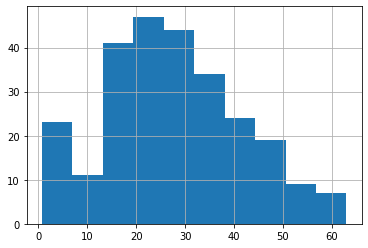

In [439]:
draw_hist_gender('female', 'Age');

In [440]:
df[df['Sex'] == 'female'].Age.describe()

count    259.000000
mean      27.745174
std       13.989760
min        0.750000
25%       18.000000
50%       27.000000
75%       36.000000
max       63.000000
Name: Age, dtype: float64

In [441]:
print("Female survivors: ", survivors_gender('female').shape[0])

Female survivors:  231


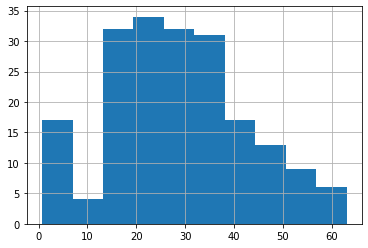

In [442]:
df[(df['Sex'] == 'female') & (df['Survived'] == 1)].Age.hist();

In [443]:
df[(df['Sex'] == 'female') & (df['Survived'] == 1)].Age.describe()

count    195.000000
mean      28.630769
std       14.030672
min        0.750000
25%       19.000000
50%       28.000000
75%       36.000000
max       63.000000
Name: Age, dtype: float64

**Analysis**:

We don't see much of a difference of either the mean or std deviation for the survivors. 

Both the histograms also look identical

### Male

In [444]:
print("Total number of male passengers: ", num_passengers_gender('male'))

Total number of male passengers:  577


Below we will see how
- distribution of males looks like
- how distribution of the male survivors look like

In [445]:
df[df['Sex'] == 'male'].Age.describe()

count    453.000000
mean      30.726645
std       14.678201
min        0.420000
25%       21.000000
50%       29.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

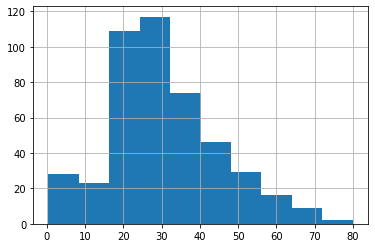

In [446]:
draw_hist_gender('male', 'Age');

In [447]:
df[df['Sex'] == 'male'].Age.describe()

count    453.000000
mean      30.726645
std       14.678201
min        0.420000
25%       21.000000
50%       29.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

In [448]:
print("Male survivors: ", survivors_gender('male').shape[0])

Male survivors:  109


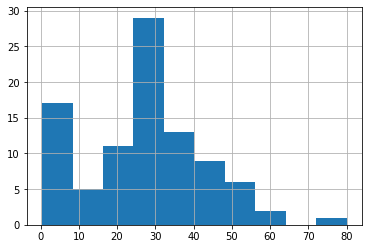

In [449]:
df[(df['Sex'] == 'male') & (df['Survived'] == 1)].Age.hist();

In [450]:
df[(df['Sex'] == 'male') & (df['Survived'] == 1)].Age.describe()

count    93.000000
mean     27.276022
std      16.504803
min       0.420000
25%      18.000000
50%      28.000000
75%      36.000000
max      80.000000
Name: Age, dtype: float64

**Analysis**:

We don't see much of a difference of either the mean or std deviation for the survivors. 

It is apparent from the histogram that the ages 27-31 are bulk of the survivors.

### Survival of Different classes

The question we want to answer for ourselves in this section is whether being in first class for example increases the chances of survival. 

First let us look at the number of passengers in the 3 different classes

In [451]:
print("Passengers in Class1: ", df[['Pclass1']].sum())
print("Passengers in Class2: ", df[['Pclass2']].sum())
print("Passengers in Class3: ", df[['Pclass3']].sum())

Passengers in Class1:  Pclass1    214
dtype: int64
Passengers in Class2:  Pclass2    184
dtype: int64
Passengers in Class3:  Pclass3    491
dtype: int64


In [452]:
# Helper lambda to get survivors from class. input: class number 1, 2, or 3
class_survived = lambda p_class: df[(df.Pclass == p_class) & (df['Survived'] == 1)].shape[0]

In [453]:
print("Class 1 survivors: ", class_survived(1))
print("Class 2 survivors: ", class_survived(2))
print("Class 3 survivors: ", class_survived(3))


Class 1 survivors:  134
Class 2 survivors:  87
Class 3 survivors:  119


So, 136 out of 216 class-1 passengers survived (63%)

87 out of 184 class-2 passengers survived  (47%)

and 119 out of 491 class-3 passengers survived (24%)

Let us first look at the Class 1 passengers and the people who survived. This includes both genders.


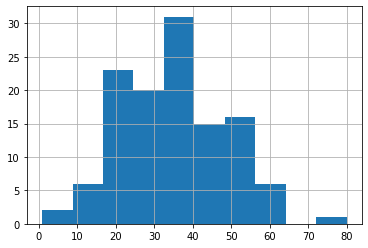

In [454]:
df[(df.Pclass == 1) & (df['Survived'] == 1)].Age.hist();

Here we see that the 78 year old passenger was a survivor. Also, many of the people seem to have survived. The visualization looks like what we would expect.


In case of class 2:


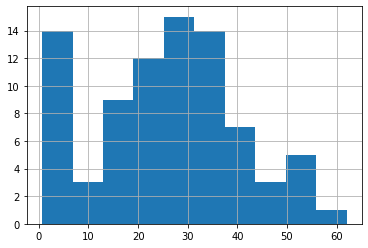

In [455]:
df[(df.Pclass == 2) & (df['Survived'] == 1)].Age.hist();

Note that there's a skew towards the younger population (children). They might've been evacuated as a priority


For class-3 passengers:
Besides the very young kids, only younger ones seem to have survived. The histogram tapers downwards very sharply after age 30. The anomaly is the passenger at around 60 years

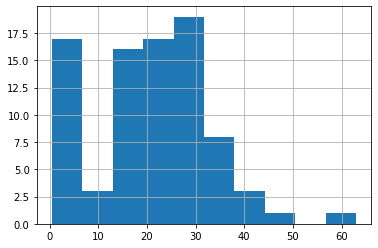

In [456]:
df[(df.Pclass == 3) & (df['Survived'] == 1)].Age.hist();

Let us look at the male and female survivors among class 3

In [457]:
df[(df.Pclass == 3) & (df['Survived'] == 1)].Sex.value_counts()

female    72
male      47
Name: Sex, dtype: int64

In [458]:
df[(df.Pclass == 3)].Sex.value_counts()

male      347
female    144
Name: Sex, dtype: int64

So, 136 out of 216 class-1 passengers survived (63%),

87 out of 184 class-2 passengers survived (47%) 

and 119 out of 491 class-3 passengers survived (24%).



# Conclusion
We did a two dimensional analysis of the survivors of the Titanic. Most of the female passengers survived the fated shipwreck. 

Men were lucky to have been aged 27–31 and in first class. Otherwise, the odds of them surviving is very low.

63% of the passengers in Class 1 survived whereas only 24% of the Class 3 passengers survived. Out of 144 females in class 3, 72 survived. Out of 347 men in the same class only 47 survived.

### Dropped Data

There were two passengers who never embarked on the Titanic. So we discarded that data. Also, some columns like Ticket Number, Cabin etc. weren't very useful so those were dropped too.

### Missing Data
For the problem we were tackling, we didn't encounter any missing data that required imputation

### Categorical Variables
In our analysis, we used Pclass values as categorical variables since every person belonged to either 1st, 2nd or 3rd class. 

The other categorical variables were the ports where people embarked from. They were not used much in the analysis as we don't see any causation from where people embarked to the crash.

### Revisiting the Questions
- Based on Gender, females are most likely to survive.
- Young children were most likely to survive. Also, a mean age of 27-28 years has more survival chances
- Class 1 passengers were more likely to survive. Class 3 passenger's survival was less than 20%.